In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!pip install face_recognition

Initialize

In [ ]:
#FAce detection
#sliding window
#hog features

In [ ]:
   import matplotlib.pyplot as plt
   from skimage.feature import hog
   from skimage import data, exposure
   import cv2


In [ ]:
def Readimg(inputimg):
  img=cv2.imread(inputimg)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img
Aleximg=Readimg('AlexF.jpg')  #can use desired image

In [ ]:
#fd is feature descriptor
fd,hog_img=hog(Aleximg,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)

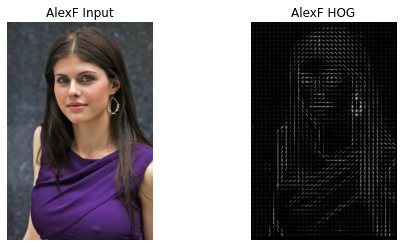

In [ ]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(Aleximg,cmap=plt.cm.gray)
ax1.set_title('AlexF Input')

hog_img_rescal=exposure.rescale_intensity(hog_img,in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_img_rescal,cmap=plt.cm.gray)
ax2.set_title('AlexF HOG')
plt.show()

In [ ]:
print('AlexF image size:',Aleximg.shape) 
print('HOG size:',len(fd))

AlexF image size: (845, 564, 3)
HOG size: 14560


Face Detection


In [ ]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
%matplotlib inline


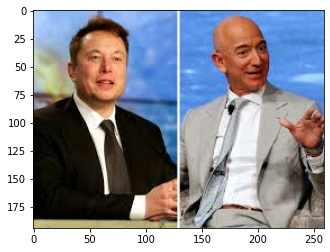

In [ ]:
img1=Readimg('ElonandJeff.jpg')  #use desired image
plt.imshow(img1)

In [ ]:
#slidingwindow classifier
def Noof_faces(inpimg):
  FL=face_recognition.face_locations(inpimg)
  No_of_faces=len(FL)
  print('Found {} faces'.format(No_of_faces))

Noof_faces(img1)

Found 2 faces


Found 2 faces
Face is located at pixel loc TOP26 Right89 Bottom78 Left37
Face is located at pixel loc TOP22 Right218 Bottom65 Left175


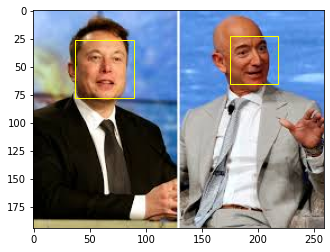

In [ ]:
FL=face_recognition.face_locations(img1)
No_of_faces=len(FL)
print('Found {} faces'.format(No_of_faces))

plt.imshow(img1)
ax=plt.gca()
for face_loc in FL:
  top,right,bottom,left=face_loc
  x,y,z,w = left,top,right,bottom
  print('Face is located at pixel loc TOP{} Right{} Bottom{} Left{}'.format(y,z,w,x))

  recta=Rectangle((x,y),z-x,w-y,fill=False,color='yellow')
  ax.add_patch(recta)

plt.show()

Face Recognition

In [ ]:
Alex=Aleximg
Elon=Readimg('Elon.jpg')
Jeff=Readimg('jeff.jpg')

In [ ]:
#face_encoding
def face_encod(inimg):
  FE=face_recognition.face_encodings(inimg)[0]
  return FE
Alex_encod=face_encod(Alex)
Elon_encod=face_encod(Elon)
Jeff_encod=face_encod(Jeff)
#def databas(encodeimg):
  #global Know_face_encoding
Know_face_encoding=[Alex_encod,Elon_encod,Jeff_encod]
  #Know_face_encoding.append(encodeimg)
#databas(Alex_encod)
#databas(Elon_encod)
#databas(Jeff_encod)
len(Know_face_encoding)

3

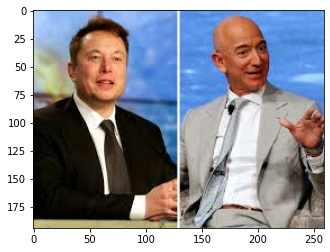

In [ ]:
 Uimg=Readimg('ElonandJeff.jpg')
 plt.imshow(Uimg)

 Uimg_face_encod=face_recognition.face_encodings(Uimg)

In [ ]:
#euclidean distance(for threshould)
from scipy.spatial import distance

In [ ]:
for unknown_encod in Uimg_face_encod:
  result=[]
  for known_face in Know_face_encoding:
    eud=distance.euclidean(known_face,unknown_encod)
    result.append(eud)
  threshould=0.6
  result=np.array(result) <= threshould

  name='Unknown'

  if result[0]:
    name='Alexandra'
  elif result[1]:
    name='Elon Musk'
  elif result[2]:
    name='Jeff Bezos'
  print('Found "{}" in the picture'.format(name))

Found "Elon Musk" in the picture
Found "Jeff Bezos" in the picture


Face Landmark

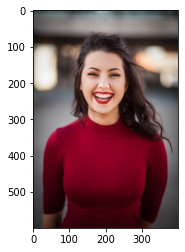

In [ ]:
Girl=Readimg('redgirlL.jpg')
plt.imshow(Girl)

In [ ]:
Flandlis=face_recognition.face_landmarks(Girl)

In [ ]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

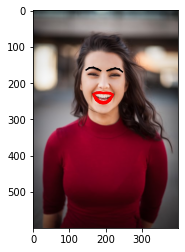

In [ ]:
plt.imshow(Girl)
ax=plt.gca()

for face_land in Flandlis:
  left_eyebrow_pts=face_land['left_eyebrow']
  pre_x,pre_y=left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x],[pre_y,y],color='k')
    ax.add_line(l)
    pre_x,pre_y=x,y
  right_eyebrow_pts=face_land['right_eyebrow']
  pre_x,pre_y=right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l=mlines.Line2D([pre_x,x],[pre_y,y],color='k')
    ax.add_line(l)
    pre_x,pre_y=x,y
  
  p=Polygon(face_land['top_lip'],facecolor='r',edgecolor='r')
  ax.add_patch(p)
  p=Polygon(face_land['bottom_lip'],facecolor='r',edgecolor='r')
  ax.add_patch(p)

plt.show()
  

